**Sumber Dataset: https://www.kaggle.com/ronitf/heart-disease-uci**

**Dataset Name:** Heart Disease UCI

**Attribute Dataset Information:**
1. age = Umur
2. sex = Gender
3. cp = chest pain type (4 values)
4. trestbps = resting blood pressure
5. chol = serum cholestoral in mg/dl
6. fbs = fasting blood sugar > 120 mg/dl
7. restecg = resting electrocardiographic results (values 0,1,2)
8. thalach = maximum heart rate achieved
9. exang = exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. slope = the slope of the peak exercise ST segment
12. ca = number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 = heart disease true; 0 = heart disease false

# **Week 1 - Introduction**

In [1]:
# Install mglearn packages
!pip install mglearn

In [2]:
# import library

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import mglearn
import seaborn as sns

In [3]:
# connect to google drive

# from google.colab import drive
# drive.mount('/content/drive')

# path = '/content/drive/My Drive/Colab Notebooks/Machine Learning Class/Tugas Sebelum UTS/Categorical Data - Heart Disease/'

path = ''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Baca dan load dataset heart disease

dataset = pd.read_csv(path + 'heart.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Cetak dataset
print(dataset)

     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      

In [6]:
# Cetak dimensi ukuran dari dataset
dataset.shape

(303, 14)

In [7]:
# Cetak 5 data pertama dari dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Buat variabel data sebagai data attributes dengan menghapus feature target
data = dataset.copy().drop(['target'], axis=1)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [9]:
# Simpan nama feature atau kolom dari data 
feature_names = data.columns
feature_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [10]:
# Buat variabel target sebagai target data
target = dataset['target']
# Buat dan cetak variabel nama target
target_names = ["No", "Yes"]
print("Nama target : {}".format(target_names))

Nama target : ['No', 'Yes']


In [11]:
# Cek distribusi dari kolom kelas target
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [12]:
# Tampilkan persentase distribusi dari kolom kelas target
dataset['target'].value_counts()/np.float(len(dataset))

1    0.544554
0    0.455446
Name: target, dtype: float64

In [13]:
# Cetak ukuran dimensi dari data dan target
print("Shape data : {}".format(data.shape))
print("Shape target : {}".format(target.shape))

Shape data : (303, 13)
Shape target : (303,)


In [14]:
# Melihat rangkuman informasi dari dataset berupa missing value dan tipe data tiap kolom atau feature
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
# Import library train test split dari model selection
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data train dan test dengan ukuran test 25% dan train 75% dengan random state 0
X_train, X_test, y_train, y_test = train_test_split(data.to_numpy(), target.to_numpy(), test_size=0.25, random_state=0)

# Cetak ukuran dimensi dari X_train, y_train, X_test, y_test
print("Shape X_train : {}".format(X_train.shape))
print("Shape y_train : {}".format(y_train.shape))
print("Shape X_test : {}".format(X_test.shape))
print("Shape y_test : {}".format(y_test.shape))

Shape X_train : (227, 13)
Shape y_train : (227,)
Shape X_test : (76, 13)
Shape y_test : (76,)


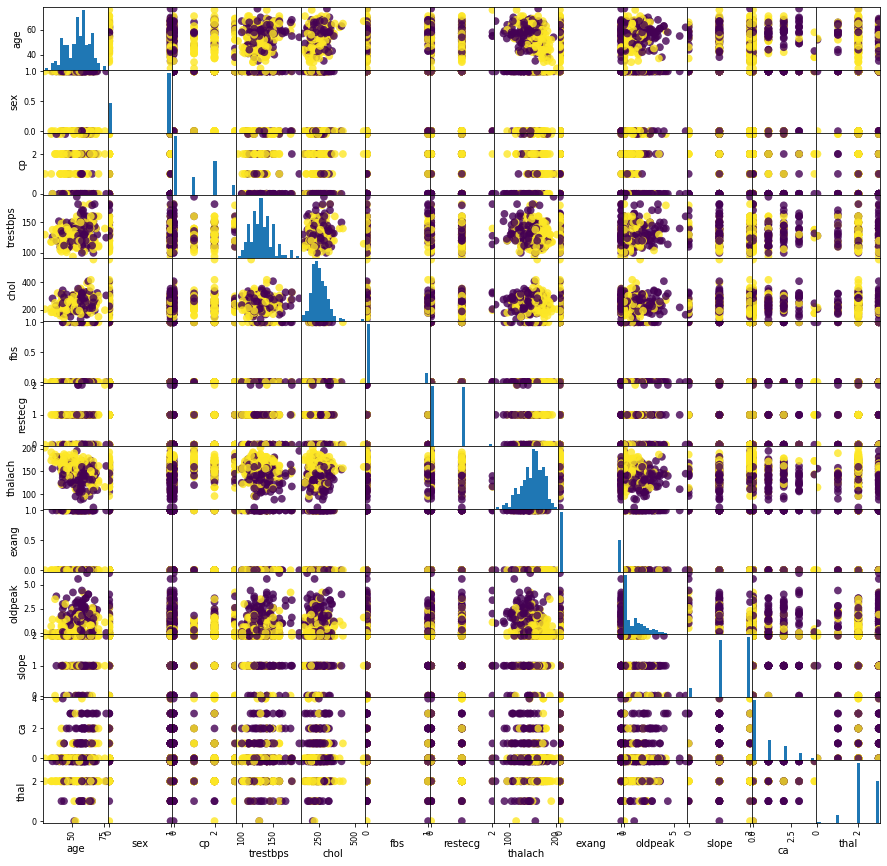

In [16]:
# Visualisasi plotting scatter matrix dari data training
dataframe = pd.DataFrame(X_train, columns=feature_names)
gr = pd.plotting.scatter_matrix(dataframe,
                                c=y_train,
                                figsize=(15,15),
                                marker='o',
                                hist_kwds={'bins': 20},
                                s=60,
                                alpha=.8)

In [17]:
# Import library KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Bangun model KNN Classifier dengan neighbors = 1 dan sisanya default parameter
knn = KNeighborsClassifier(n_neighbors=1)

# Terapkan model pada data training
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [18]:
# Buat dummy data train baru guna dilakukan test prediksi model
x_baru = np.array([[20,1,3,145,233,1,0,150,0,2.3,0,0,1]])
# Cetak ukuran dimensi dari dummy data
print(x_baru.shape)

(1, 13)


In [19]:
# Lakukan prediksi pada dummy data menggunakan model KNN
prediksi = knn.predict(x_baru)

# Cetak hasil prediksi dummy data
print("Prediksi {}".format(prediksi))
print("Hasil prediksi target : {}".format(target_names[prediksi[0]]))

Prediksi [1]
Hasil prediksi target : Yes


In [20]:
# Prediksi test set menggunakan model KNN
y_pred = knn.predict(X_test)
# Cetak hasil prediksi pada data test set
print("Prediksi dengan data uji : \n {}".format(y_pred))

Prediksi dengan data uji : 
 [0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 0]


In [21]:
# Cetak akurasi model pada training dan test set
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.526


# **Week 2 - Data Preprocessing**

## **Handling Missing Value**

In [22]:
# Cek missing value pada data set
dataset.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
# Cek jumlah total missing value pada setiap feature atau kolom
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

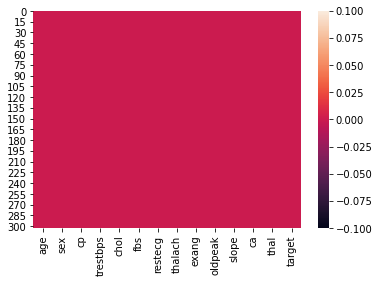

In [24]:
# Seaborn heatmap shows the clear view off entire dataset that theres no null
sns.heatmap(dataset.isnull())

**Because no missing value in our dataset, we dont need to use dropna and fillna.
So, here we comment this code**

In [25]:
## Handle missing value dengan drop data atau isi cell kosong, tetapi pada dataset ini tidak terdapat missing value

# dataset.dropna(axis=0)
# dataset.dropna(axis=1)
# dataset.dropna(how='all')
# dataset.dropna(thresh=11)
# dataset.dropna(subset=['age'])

## Fill missing value with mean
# dataset = dataset.fillna(dataset.mean())

# dataset.values

In [26]:
# Lihat 5 data pertama dari dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# Lihat 5 data terakhir dari dataset
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## **Data Normalization**

In [28]:
# Bagi dataset menjadi data train dan test set dengan ukuran training 75% dan test 25% dengan startify target dan random state 0
X_train, X_test, y_train, y_test = train_test_split(data.to_numpy(), target.to_numpy(), test_size=0.25, random_state=0, stratify=target.to_numpy())

### **Min Max Normalization**

In [29]:
# Import library Min Max Scaler untuk normalization
from sklearn.preprocessing import MinMaxScaler

# Lakukan proses Min Max Normalization untuk data X (attribute)
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

# Cetak ukuran dimensi dari data hasil normalisasi
print("Shape X_train_norm : {}".format(X_train_norm.shape))
print("Shape X_test_norm : {}".format(X_test_norm.shape))

Shape X_train_norm : (227, 13)
Shape X_test_norm : (76, 13)


In [30]:
# Cetak data X_train setelah dilakukan normalisasi
X_train_norm

array([[0.18604651, 1.        , 1.        , ..., 1.        , 0.5       ,
        0.66666667],
       [0.55813953, 0.        , 0.        , ..., 0.5       , 0.        ,
        0.66666667],
       [0.39534884, 1.        , 0.66666667, ..., 0.5       , 0.        ,
        0.66666667],
       ...,
       [0.72093023, 0.        , 0.        , ..., 0.5       , 0.75      ,
        1.        ],
       [0.44186047, 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.39534884, 1.        , 0.66666667, ..., 1.        , 0.25      ,
        1.        ]])

In [31]:
# Cetak data X_test setelah dilakukan normalisasi
X_test_norm

array([[0.26190476, 1.        , 1.        , 0.4       , 0.19230769,
        0.        , 1.        , 0.77358491, 1.        , 0.22580645,
        1.        , 0.        , 1.        ],
       [0.78571429, 0.        , 0.        , 0.4       , 0.94230769,
        0.        , 0.        , 0.5754717 , 0.        , 0.19354839,
        0.5       , 0.        , 0.5       ],
       [0.83333333, 1.        , 0.66666667, 0.4       , 0.71538462,
        0.        , 1.        , 0.58490566, 0.        , 0.        ,
        1.        , 0.        , 0.5       ],
       [0.64285714, 0.        , 0.        , 1.        , 0.53461538,
        1.        , 0.        , 0.3490566 , 1.        , 0.64516129,
        0.        , 0.66666667, 1.        ],
       [0.66666667, 0.        , 0.        , 0.2       , 0.78846154,
        0.        , 1.        , 0.63207547, 1.        , 0.09677419,
        1.        , 0.        , 0.5       ],
       [0.35714286, 0.        , 0.66666667, 0.18      , 0.35769231,
        0.        , 1.     

### **Standard Normalization**

In [32]:
# Import Library Standard Scaler untuk normalization
from sklearn.preprocessing import StandardScaler

# Lakukan proses Standard Normalization untuk data X (attribute)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

# Cetak ukuran dimensi data hasil normalisasi
print("Shape X_train_std : {}".format(X_train_std.shape))
print("Shape X_test_std : {}".format(X_test_std.shape))

Shape X_train_std : (227, 13)
Shape X_test_std : (76, 13)


In [33]:
# Cetak data X_train setelah dilakukan normalisasi
X_train_std

array([[-1.35685398,  0.64026392,  1.95519993, ...,  0.96757589,
         1.20316371, -0.51208215],
       [ 0.40380828, -1.56185593, -0.93934605, ..., -0.6356338 ,
        -0.71345497, -0.51208215],
       [-0.36648146,  0.64026392,  0.99035127, ..., -0.6356338 ,
        -0.71345497, -0.51208215],
       ...,
       [ 1.17409801, -1.56185593, -0.93934605, ..., -0.6356338 ,
         2.16147306,  1.08028289],
       [-0.14639868,  0.64026392, -0.93934605, ..., -0.6356338 ,
         1.20316371,  1.08028289],
       [-0.36648146,  0.64026392,  0.99035127, ...,  0.96757589,
         0.24485437,  1.08028289]])

In [34]:
# Cetak data X_test setelah dilakukan normalisasi
X_test_std

array([[-1.60728044e+00,  8.07572853e-01,  2.02888479e+00,
         5.05775654e-01, -1.02499522e+00, -3.18511029e-01,
         1.02667135e+00,  1.23077103e+00,  1.30930734e+00,
         2.58096092e-01,  1.00547676e+00, -7.21110255e-01,
         1.27420878e+00],
       [ 8.35785829e-01, -1.23827837e+00, -9.36408363e-01,
         5.05775654e-01,  2.66289726e+00, -3.18511029e-01,
        -9.74021534e-01,  2.98934898e-01, -7.63762616e-01,
         9.11573433e-02, -6.92661771e-01, -7.21110255e-01,
        -5.19122096e-01],
       [ 1.05788276e+00,  8.07572853e-01,  1.04045374e+00,
         5.05775654e-01,  1.54707338e+00, -3.18511029e-01,
         1.02667135e+00,  3.43308047e-01, -7.63762616e-01,
        -9.10475151e-01,  1.00547676e+00, -7.21110255e-01,
        -5.19122096e-01],
       [ 1.69495028e-01, -1.23827837e+00, -9.36408363e-01,
         3.94293956e+00,  6.58196734e-01,  3.13960871e+00,
        -9.74021534e-01, -7.66020677e-01,  1.30930734e+00,
         2.42829983e+00, -2.39080031e

# **Week 3 - Data Representation and Feature Engineering**

In [35]:
# Melihat informasi missing value dan tipe data pada dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
# Melihat informasi deskripsi dari dataset
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1    165
0    138
Name: target, dtype: int64

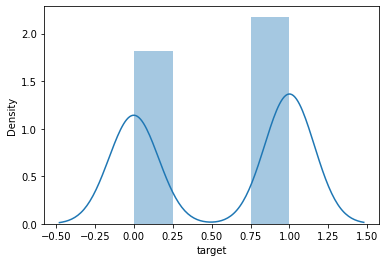

In [37]:
# Visualisasi distplot data target dengan jumlah datanya
sns.distplot(target)
target.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ploting of Age Feature')

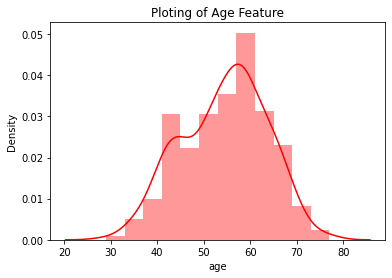

In [38]:
# Visualisasi distplot data per feature age
sns.distplot(dataset["age"], color= "red" )
plt.title("Ploting of Age Feature")

In [39]:
# Cari dan cetak minimum, maksimum, dan rata-rata dari feature age
min_age = min(dataset["age"])
max_age = max(dataset["age"])
avg_age = (dataset["age"]).mean()

print("Minimum age:",min_age)
print("Maximum age:",max_age)
print("Average age:",avg_age)

Minimum age: 29
Maximum age: 77
Average age: 54.366336633663366


In [40]:
# Dari hasil umur di atas, kita dapat membagi lagi data berdasarkan umurnya
# Disini data dibagi lagi menjadi young, meddle, dan elderly
young_age = dataset[(dataset['age'] >= 29)&(dataset['age'] < 40)]
meddle_age = dataset[(dataset['age'] >= 40)&(dataset['age'] < 55)]
elderly_age = dataset[(dataset['age'] > 55)]

# Cetak ukuran pembagian data berdasarkan umur
print("Young age people: {}".format(len(young_age)))
print("Meddle age people: {}".format(len(meddle_age)))
print("Elderly age people: {}".format(len(elderly_age)))

Young age people: 16
Meddle age people: 128
Elderly age people: 151


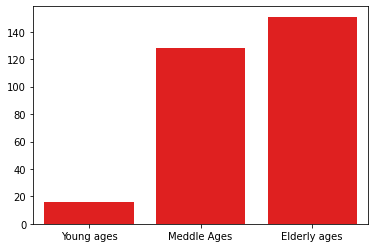

In [41]:
# Visualisasi bar plot pada pembagian data berdasarkan umur
sns.barplot(x = ["Young ages","Meddle Ages","Elderly ages"], y =[len(young_age),len(meddle_age),len(elderly_age)], color = "red")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


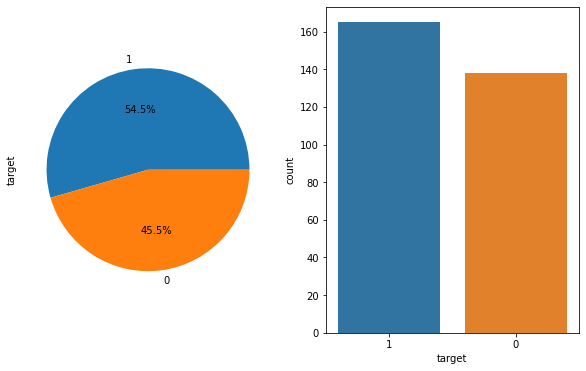

In [42]:
# Visualisasi dengan pie dan bar plot untuk jumlah target feature
f, ax = plt.subplots(1,2,figsize=(10,6))
target.value_counts().plot.pie(ax = ax[0],autopct='%1.1f%%')
sns.countplot('target', data=dataset, ax=ax[1],order=dataset['sex'].value_counts().index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'heart disease by sex')

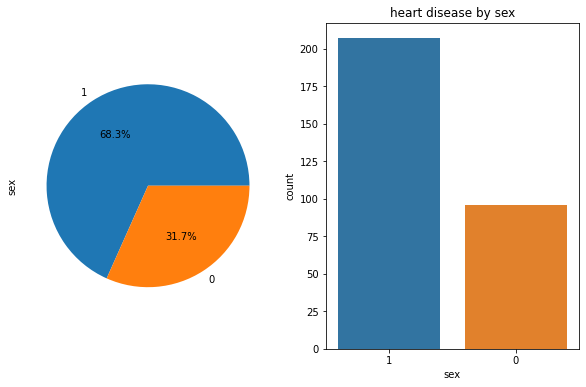

In [43]:
# Visualisasi dengan pie dan bar plot untuk target feature berdasarkan umur
f, ax = plt.subplots(1,2,figsize=(10,6))
dataset["sex"].value_counts().plot.pie(ax = ax[0],autopct='%1.1f%%')
sns.countplot('sex',data=dataset,ax=ax[1],order=dataset['sex'].value_counts().index)
plt.title("heart disease by sex")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'by type of chest pain')

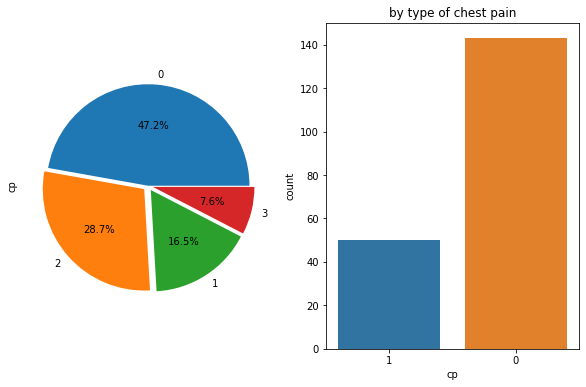

In [44]:
# Visualisasi dengan pie dan bar plot untuk target feature berdasarkan nyeri data atau feature 'cp'
f,ax=plt.subplots(1,2,figsize=(10,6))
dataset["cp"].value_counts().plot.pie(ax = ax[0],autopct='%1.1f%%',explode = [0,0.05,0.05,0.05])
sns.countplot('cp',data=dataset,ax=ax[1],order=dataset['sex'].value_counts().index)
plt.title("by type of chest pain")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


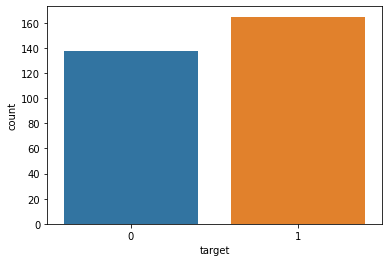

In [45]:
# Plot the target variable
# With the displot visulization we can see the average age of people suuffering from heart disease

sns.countplot(target)
# Where 0 shows that no heart attack and 1 shows that having an heart attack

(0.0, 1.0, 0.0, 1.0)

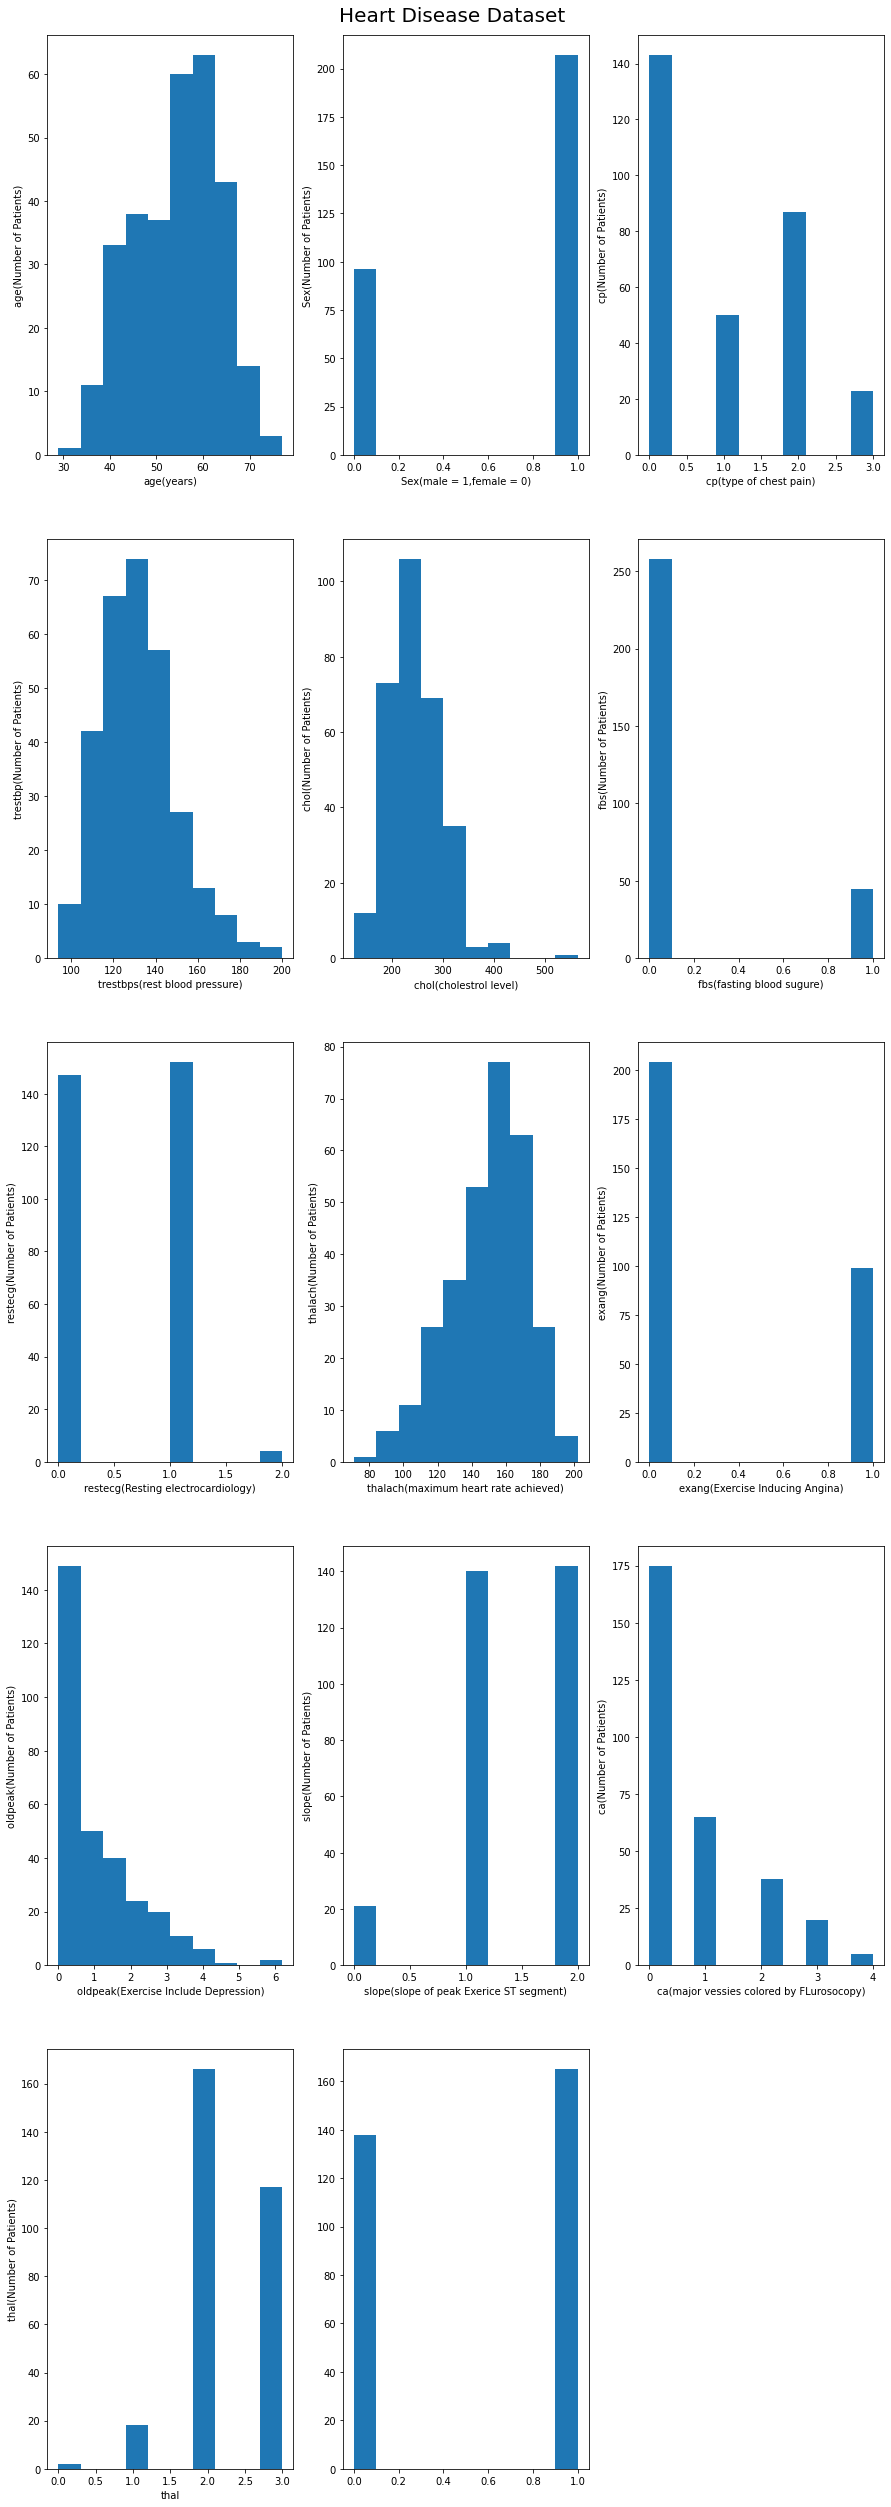

In [46]:
# Visualisasi dengan histogram pada persebaran data untuk setiap feature
fig, axes = plt.subplots( nrows=5, ncols=3, figsize=(15,40) )
# Adjust subplots
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
# Set subtitle
plt.suptitle("Heart Disease Dataset", fontsize=20)

# Histogram feature age
axes[0,0].hist(dataset.age)
axes[0,0].set_xlabel("age(years)")
axes[0,0].set_ylabel("age(Number of Patients)")

# Histogram feature sex
axes[0,1].hist(dataset.sex)
axes[0,1].set_xlabel("Sex(male = 1,female = 0)")
axes[0,1].set_ylabel("Sex(Number of Patients)")

# Histogram feature cp
axes[0,2].hist(dataset.cp)
axes[0,2].set_xlabel("cp(type of chest pain)")
axes[0,2].set_ylabel("cp(Number of Patients)")

# Histogram feature trestbps
axes[1,0].hist(dataset.trestbps)
axes[1,0].set_xlabel("trestbps(rest blood pressure)")
axes[1,0].set_ylabel("trestbp(Number of Patients)")

# Histogram feature cholesterol
axes[1,1].hist(dataset.chol)
axes[1,1].set_xlabel("chol(cholestrol level)")
axes[1,1].set_ylabel("chol(Number of Patients)")

# Histogram feature fbs
axes[1,2].hist(dataset.fbs)
axes[1,2].set_xlabel("fbs(fasting blood sugure)")
axes[1,2].set_ylabel("fbs(Number of Patients)")

# Histogram feature restecg
axes[2,0].hist(dataset.restecg)
axes[2,0].set_xlabel("restecg(Resting electrocardiology)")
axes[2,0].set_ylabel("restecg(Number of Patients)")

# Histogram feature thalach
axes[2,1].hist(dataset.thalach)
axes[2,1].set_xlabel("thalach(maximum heart rate achieved)")
axes[2,1].set_ylabel("thalach(Number of Patients)")

# Histogram feature exang
axes[2,2].hist(dataset.exang)
axes[2,2].set_xlabel("exang(Exercise Inducing Angina)")
axes[2,2].set_ylabel("exang(Number of Patients)")

# Histogram feature oldpeak
axes[3,0].hist(dataset.oldpeak)
axes[3,0].set_xlabel("oldpeak(Exercise Include Depression)")
axes[3,0].set_ylabel("oldpeak(Number of Patients)")

# Histogram feature slope
axes[3,1].hist(dataset.slope)
axes[3,1].set_xlabel("slope(slope of peak Exerice ST segment)")
axes[3,1].set_ylabel("slope(Number of Patients)")

# Histogram feature ca
axes[3,2].hist(dataset.ca)
axes[3,2].set_xlabel("ca(major vessies colored by FLurosocopy)")
axes[3,2].set_ylabel("ca(Number of Patients)")

# Histogram feature thal
axes[4,0].hist(dataset.thal)
axes[4,0].set_xlabel("thal")
axes[4,0].set_ylabel("thal(Number of Patients)")

axes[4,1].hist(dataset.target)
axes[4,2].axis("off")

In [47]:
# Dataset correlation between each feature
cormat = dataset.corr()

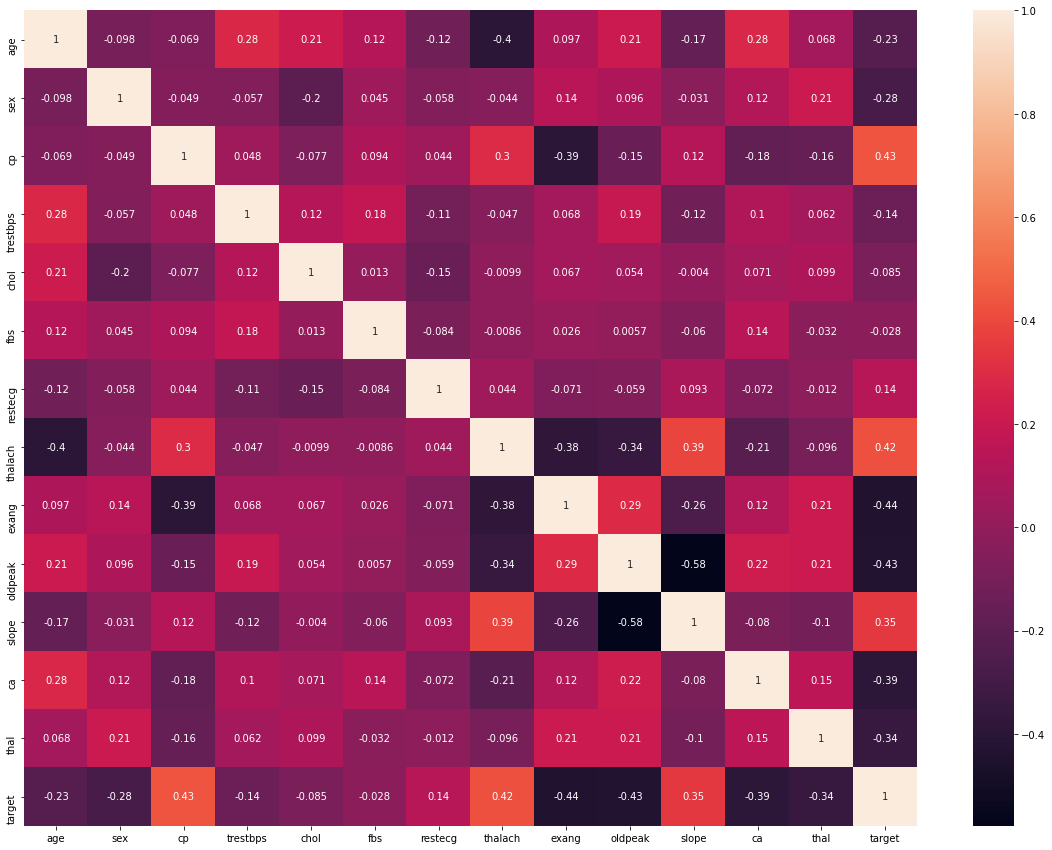

In [48]:
# Visualisasi dengan heatmap pada korelasi setiap fitur pada dataset
plt.figure(figsize =(20,15))
sns.heatmap(cormat, annot= True)

# **Week 4 - Supervised Learning I**

## **Logistic Regression**

In [49]:
# Import model logistic regression
from sklearn.linear_model import LogisticRegression

# Bagi dataset menjadi 20% test dan 80% training dengan stratify target dan random state 42
X_train, X_test, y_train, y_test = train_test_split(data.to_numpy(), target.to_numpy(), test_size=0.2, stratify=target.to_numpy(), random_state=42)

In [50]:
# Bangun model logistic regression dengan max_iter 1000
lr = LogisticRegression(max_iter=1000)
# Terapkan model pada training set
lr.fit(X_train,y_train)

# Prediksi test set menggunakan model
y_pred_lr = lr.predict(X_test)

# Cetak akurasi dari training dan test set
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training set: 0.851
Accuracy on test set: 0.803


**Using Logistic Regression, we get the acuraction score: 0.803**

## **Decision Tree**

In [51]:
# Import library decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Bagi data menjadi training dan test dataset dengan data 20% test, 80% training dan startify target dan random state = 42
X_train, X_test, y_train, y_test = train_test_split(data.to_numpy(), target.to_numpy(), test_size=0.2, stratify=target.to_numpy(), random_state=42)
# Bangun model decision tree classifier dengan maksimum kedalaman 4 dan random state 0, dan sisanya default parameter
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
# Terapkan model pada training set
tree.fit(X_train, y_train)

# Cetak akurasi model pada training dan test set
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.905
Accuracy on test set: 0.803


In [52]:
# Import library export graphviz dari tree
from sklearn.tree import export_graphviz

# Persiapkan graphviz tree untuk proses visualisasi
export_graphviz(tree, out_file="tree.dot", class_names=target_names,
                feature_names=feature_names, impurity=False, filled=True)

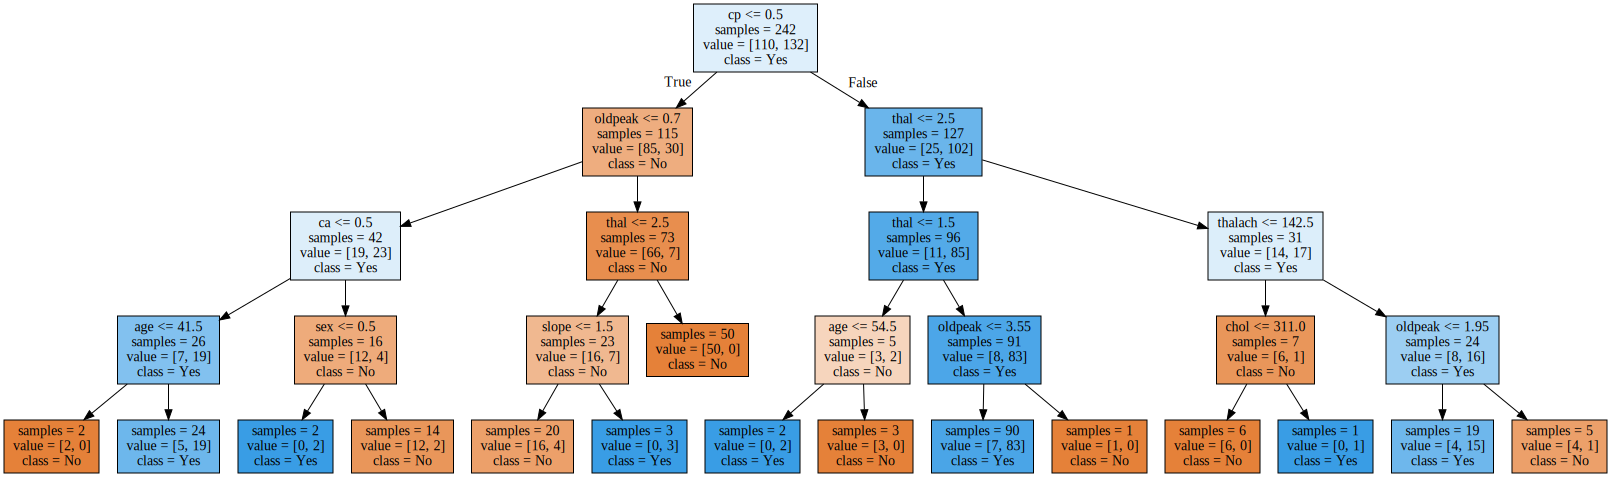

In [53]:
# Import library graphviz
import graphviz

# Visualisasi tree dengan graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [54]:
# Cek peranan tiap feature/ atribut dalam model DT yang dibentuk dengan 'feature_importances_'
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.05789299 0.03157922 0.43590355 0.         0.02105282 0.
 0.         0.03652173 0.         0.18806758 0.04100722 0.05623081
 0.13174408]


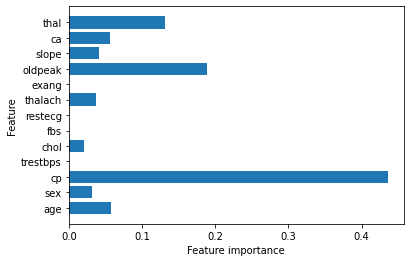

In [55]:
# Sajikan kontribusi tiap atribut dalam bentuk diagram
def plot_feature_importances_heart_disease(model):
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_heart_disease(tree)

**Using Decision Tree, we get the acuraction score: 0.803**

## **Random Forests**

In [56]:
# Import random forest classifier dari ensemble
from sklearn.ensemble import RandomForestClassifier

# Bagi data menjadi 20% test set, 80% training set, startify target, dan random state 12
X_train, X_test, y_train, y_test = train_test_split(data.to_numpy(), target.to_numpy(), test_size=0.2, random_state=1234, stratify=target.to_numpy())

# Bangun model random forest classifier dengan random state 1234 dan sisanya default parameter
rf = RandomForestClassifier(random_state=1234)
# Terapkan model pada training set
rf.fit(X_train, y_train)

# Cetak akurasi model pada training dan test set
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.852


**Using Random Forests, we get the acuraction score: 0.852**

# **Week 5 - Supervised Learning II**

## **K-Nearest Neighbors**

In [57]:
# Import KNN Classifier dari neighbors
from sklearn.neighbors import KNeighborsClassifier

# Bagi dataset menjadi training dan test set dengan total persentase default
X_train, X_test, y_train, y_test = train_test_split(data.to_numpy(), target.to_numpy(), random_state=0, stratify=target.to_numpy())

**KNN with Default Dataset**

In [58]:
# Buat variable list untuk menyimpan akurasi dari training dan test
training_accuracy = []
training_accuracy.clear()
test_accuracy = []
test_accuracy.clear()
# Buat neighbors setting dari 1-30 untuk dilakukan percobaan mencari akurasi yang optimal
neighbors_settings = range(1, 31)
# Buat variable untuk menampung hasil akurasi dan k yang optimal
highest_accuracy = 0
k_chosen = 0

# Lakukan looping percobaan menggunakan K = 1-30
for neighbors in neighbors_settings:
  # Bangun model KNeighborsClassifier dengan jumlah neighbors dynamic 1-30 
  clf = KNeighborsClassifier(n_neighbors=neighbors)
  # Terapkan model pada training set
  clf.fit(X_train, y_train)
  # Simpan akurasi pada data training dan test set ke list
  train_score = clf.score(X_train, y_train)
  training_accuracy.append(train_score)
  test_score = clf.score(X_test, y_test)
  test_accuracy.append(test_score)

  # Simpan akurasi tertinggi dari percobaan menggunakan K = 1 sampai 30
  if ((test_score + train_score) / 2 > highest_accuracy):
    highest_accuracy = test_score
    k_chosen = neighbors
  # Cetak akurasi pada test set dan jumlah K
  print("With K = {:d}, Test set accuracy: {:f}".format(neighbors, test_score))

With K = 1, Test set accuracy: 0.618421
With K = 2, Test set accuracy: 0.605263
With K = 3, Test set accuracy: 0.657895
With K = 4, Test set accuracy: 0.697368
With K = 5, Test set accuracy: 0.697368
With K = 6, Test set accuracy: 0.671053
With K = 7, Test set accuracy: 0.684211
With K = 8, Test set accuracy: 0.697368
With K = 9, Test set accuracy: 0.723684
With K = 10, Test set accuracy: 0.710526
With K = 11, Test set accuracy: 0.776316
With K = 12, Test set accuracy: 0.789474
With K = 13, Test set accuracy: 0.736842
With K = 14, Test set accuracy: 0.736842
With K = 15, Test set accuracy: 0.750000
With K = 16, Test set accuracy: 0.736842
With K = 17, Test set accuracy: 0.710526
With K = 18, Test set accuracy: 0.697368
With K = 19, Test set accuracy: 0.710526
With K = 20, Test set accuracy: 0.684211
With K = 21, Test set accuracy: 0.710526
With K = 22, Test set accuracy: 0.710526
With K = 23, Test set accuracy: 0.736842
With K = 24, Test set accuracy: 0.736842
With K = 25, Test set acc

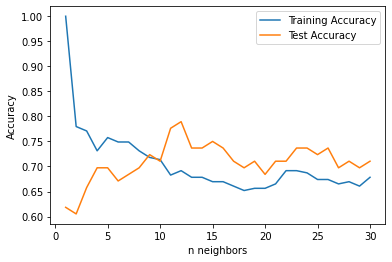

In [59]:
# Visualisasi plotting dari K = 1 sampai 30 dengan akurasi model pada test set
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
# Berikan label pada plot x dan y
plt.ylabel("Accuracy")
plt.xlabel("n neighbors")
plt.legend()

In [60]:
print("The best K is {}".format(k_chosen))
print("With the Test Accuracy is {}".format(highest_accuracy))

The best K is 11
With the Test Accuracy is 0.7763157894736842


**KNN with Min Max Normalization**

In [61]:
# Buat variable list untuk menyimpan akurasi dari training dan test
training_accuracy_norm = []
training_accuracy_norm.clear()
test_accuracy_norm = []
test_accuracy_norm.clear()
# Buat neighbors setting dari 1-30 untuk dilakukan percobaan mencari akurasi yang optimal
neighbors_settings = range(1, 31)
# Buat variable untuk menampung hasil akurasi dan k yang optimal
highest_accuracy_norm = 0
k_chosen_norm = 0

# Lakukan looping percobaan menggunakan K = 1-30
for neighbors in neighbors_settings:
  # Bangun model KNeighborsClassifier dengan jumlah neighbors dynamic 1-30 
  clf = KNeighborsClassifier(n_neighbors=neighbors)
  # Terapkan model pada training set
  clf.fit(X_train, y_train)
  # Simpan akurasi pada data training dan test set ke list
  train_score = clf.score(X_train_norm, y_train)
  training_accuracy_norm.append(train_score)
  test_score = clf.score(X_test_norm, y_test)
  test_accuracy_norm.append(test_score)
  # Simpan akurasi tertinggi dari percobaan menggunakan K = 1 sampai 30
  if ((test_score + train_score) / 2 > highest_accuracy_norm):
    highest_accuracy_norm = test_score
    k_chosen_norm = neighbors
  # Cetak akurasi pada test set dan jumlah K
  print("With K = {:d}, Test set accuracy: {:f}".format(neighbors, test_score))

With K = 1, Test set accuracy: 0.460526
With K = 2, Test set accuracy: 0.460526
With K = 3, Test set accuracy: 0.460526
With K = 4, Test set accuracy: 0.460526
With K = 5, Test set accuracy: 0.460526
With K = 6, Test set accuracy: 0.460526
With K = 7, Test set accuracy: 0.460526
With K = 8, Test set accuracy: 0.460526
With K = 9, Test set accuracy: 0.460526
With K = 10, Test set accuracy: 0.460526
With K = 11, Test set accuracy: 0.460526
With K = 12, Test set accuracy: 0.460526
With K = 13, Test set accuracy: 0.460526
With K = 14, Test set accuracy: 0.460526
With K = 15, Test set accuracy: 0.460526
With K = 16, Test set accuracy: 0.460526
With K = 17, Test set accuracy: 0.460526
With K = 18, Test set accuracy: 0.460526
With K = 19, Test set accuracy: 0.460526
With K = 20, Test set accuracy: 0.460526
With K = 21, Test set accuracy: 0.460526
With K = 22, Test set accuracy: 0.460526
With K = 23, Test set accuracy: 0.460526
With K = 24, Test set accuracy: 0.460526
With K = 25, Test set acc

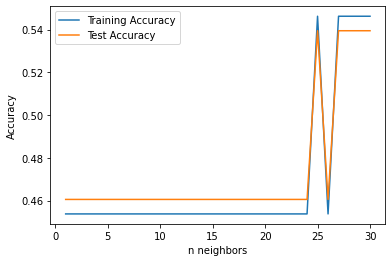

In [62]:
# Visualisasi plotting dari K = 1 sampai 30 dengan akurasi model pada test set
plt.plot(neighbors_settings, training_accuracy_norm, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy_norm, label="Test Accuracy")
# Berikan label pada plot x dan y
plt.ylabel("Accuracy")
plt.xlabel("n neighbors")
plt.legend()

In [63]:
print("The best K is {}".format(k_chosen))
print("With the Test Accuracy is {}".format(highest_accuracy))

The best K is 11
With the Test Accuracy is 0.7763157894736842


**KNN with Standard Normalization**

In [64]:
# Buat variable list untuk menyimpan akurasi dari training dan test
training_accuracy_std = []
training_accuracy_std.clear()
test_accuracy_std = []
test_accuracy_std.clear()
# Buat neighbors setting dari 1-30 untuk dilakukan percobaan mencari akurasi yang optimal
neighbors_settings = range(1, 31)
# Buat variable untuk menampung hasil akurasi dan k yang optimal
highest_accuracy_std = 0
k_chosen_std = 0

# Lakukan looping percobaan menggunakan K = 1-30
for neighbors in neighbors_settings:
  # Bangun model KNeighborsClassifier dengan jumlah neighbors dynamic 1-30 
  clf = KNeighborsClassifier(n_neighbors=neighbors)
  # Terapkan model pada training set
  clf.fit(X_train, y_train)
  # Simpan akurasi pada data training dan test set ke list
  train_score = clf.score(X_train_std, y_train)
  training_accuracy_std.append(train_score)
  test_score = clf.score(X_test_std, y_test)
  test_accuracy_std.append(test_score)
  # Simpan akurasi tertinggi dari percobaan menggunakan K = 1 sampai 30
  if ((test_score + train_score) / 2 > highest_accuracy_std):
    highest_accuracy_std = test_score
    k_chosen_std = neighbors
  # Cetak akurasi pada test set dan jumlah K
  print("With K = {:d}, Test set accuracy: {:f}".format(neighbors, test_score))

With K = 1, Test set accuracy: 0.460526
With K = 2, Test set accuracy: 0.460526
With K = 3, Test set accuracy: 0.460526
With K = 4, Test set accuracy: 0.460526
With K = 5, Test set accuracy: 0.460526
With K = 6, Test set accuracy: 0.460526
With K = 7, Test set accuracy: 0.460526
With K = 8, Test set accuracy: 0.460526
With K = 9, Test set accuracy: 0.460526
With K = 10, Test set accuracy: 0.460526
With K = 11, Test set accuracy: 0.460526
With K = 12, Test set accuracy: 0.460526
With K = 13, Test set accuracy: 0.460526
With K = 14, Test set accuracy: 0.460526
With K = 15, Test set accuracy: 0.460526
With K = 16, Test set accuracy: 0.460526
With K = 17, Test set accuracy: 0.460526
With K = 18, Test set accuracy: 0.460526
With K = 19, Test set accuracy: 0.460526
With K = 20, Test set accuracy: 0.460526
With K = 21, Test set accuracy: 0.460526
With K = 22, Test set accuracy: 0.460526
With K = 23, Test set accuracy: 0.460526
With K = 24, Test set accuracy: 0.460526
With K = 25, Test set acc

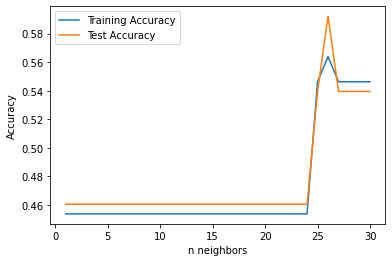

In [65]:
# Visualisasi plotting dari K = 1 sampai 30 dengan akurasi model pada test set
plt.plot(neighbors_settings, training_accuracy_std, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy_std, label="Test Accuracy")
# Berikan label pada plot x dan y
plt.ylabel("Accuracy")
plt.xlabel("n neighbors")
plt.legend()

In [66]:
# Cetak jumlah K dan akurasinya dengan akurasi paling optimal
print("The best K is {}".format(k_chosen))
print("With the Test Accuracy is {}".format(highest_accuracy))

The best K is 11
With the Test Accuracy is 0.7763157894736842


**From the aprroaches above, we can see that with K = 11, we get the best correlation for training and test accuracy**

# **Week 6 - Supervised Learning III**

## **Naive Bayes Classifier**

**Model Training**

In [67]:
# Import Library Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB

# Bangun model Gaussian Naive Bayes dengan default parameters
gnb = GaussianNB()

# Terapkan model pada training set
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
# Prediksi model pada test set
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [69]:
# Prediksi model pada train set
y_pred_train = gnb.predict(X_train)
y_pred_train

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0])

**Check Accuracy Score**

In [70]:
# Import library accuracy score metrics
from sklearn.metrics import accuracy_score

# Cetak akurasi prediksi test set dari model
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8421


In [71]:
# Cetak akurasi pada training dan test set
print("Accuracy on training set: {:.3f}".format(gnb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gnb.score(X_test, y_test)))

Accuracy on training set: 0.819
Accuracy on test set: 0.842


**Confusion Matrix**

In [72]:
# Print the Confusion Matrix and slice it into four pieces

# Import confusion matrix dari metrics
from sklearn.metrics import confusion_matrix

# Bangun confusion matrix dari test instance
cm = confusion_matrix(y_test, y_pred)

# Cetak hasil confusion matrix
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[27  8]
 [ 4 37]]

True Positives(TP) =  27

True Negatives(TN) =  37

False Positives(FP) =  8

False Negatives(FN) =  4


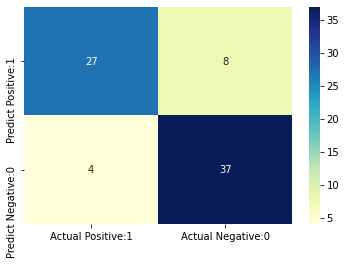

In [73]:
# Visualisasi confusion matrix dengan seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Classification Metrices**

In [74]:
# Import library classification report dari metrics
from sklearn.metrics import classification_report

# Cetak classification report dari test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.82      0.90      0.86        41

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [75]:
# Assign confusion matrix to variabel
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [76]:
# Print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8421


In [77]:
# Print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1579


In [78]:
# Print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7714


In [79]:
# Print recall or sensitivity score

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8710


In [80]:
# Print true positive rate

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8710


In [81]:
# Print false positive rate

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1778


In [82]:
# Print specificity 

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8222


**K-Fold Cross Validation**

In [83]:
# Lakukan 10-Fold Cross Validation

# Import library cross val score dari model selection
from sklearn.model_selection import cross_val_score

# Cetak cross validation score dari model gaussian naive bayes
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.86956522 0.86956522 0.91304348 0.95652174 0.7826087  0.7826087
 0.7826087  0.72727273 0.63636364 0.81818182]


In [84]:
# Cetak Rata-rata dari akurasi cross-validation

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8138


**Using Naive Bayes Classifier, we get the acuraction score: 0.8421, and 0.8138 for Cross Validation Score**

## **Support Vector Machine**

### **SVM with Default Parameters**

In [85]:
# Import library SVC classifier
from sklearn.svm import SVC

# Import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# Bangun SVC Classifier dengan default parameter
svc = SVC() 

# Terapkan classifier ke training set
svc.fit(X_train,y_train)

# Prediksi test set dengan model
y_pred = svc.predict(X_test)

# Cetak akurasi model pada test set
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.6579


**SVM with rbf kernel and C=100.0**

In [86]:
# Bangun SVC Classifier dengan C = 100 dan default parameter
svc = SVC(C=100.0) 

# Terapkan classifier ke training set
svc.fit(X_train,y_train)

# Prediksi test set dengan model
y_pred = svc.predict(X_test)

# Cetak akurasi model pada test set
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.7632


**SVM with rbf kernel and C=1000.0**

In [87]:
# Bangun SVC Classifier dengan C = 1000 dan default parameter
svc = SVC(C=1000.0) 

# Terapkan classifier ke training set
svc.fit(X_train,y_train)

# Prediksi test set dengan model
y_pred = svc.predict(X_test)

# Cetak akurasi model pada test set
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.8421


### **SVM With Linear Kernel**

**SVM with linear kernel and C=1.0**

In [88]:
# Bangun SVC Classifier dengan linear kernel dengan C = 1 dan default parameter
linear_svc = SVC(kernel='linear', C=1.0) 

# Terapkan classifier ke training set
linear_svc.fit(X_train,y_train)

# Prediksi test set dengan model
y_pred_test = linear_svc.predict(X_test)

# Cetak akurasi model pada test set
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.8684


**SVM with linear kernel and C=100.0**

In [89]:
# Bangun SVC Classifier dengan linear kernel dengan C = 100 dan default parameter
linear_svc100 = SVC(kernel='linear', C=100.0) 

# Terapkan classifier ke training set
linear_svc100.fit(X_train, y_train)

# Prediksi test set dengan model
y_pred = linear_svc100.predict(X_test)

# Cetak akurasi model pada test set
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.8684


**SVM with linear kernel and C=1000.0**

In [90]:
# Bangun SVC Classifier dengan linear kernel dengan C = 1000 dan default parameter
linear_svc1000=SVC(kernel='linear', C=1000.0) 

# Terapkan classifier ke training set
linear_svc1000.fit(X_train, y_train)

# Prediksi test set dengan model
y_pred = linear_svc1000.predict(X_test)

# Cetak akurasi model pada test set
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.8553


**Compare the train-set and test-set accuracy**

In [91]:
# Prediksi model pada data training
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1])

In [92]:
# Cetak akurasi training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8414


**Check for overfitting and underfitting**

In [93]:
# Cetak akurasi pada training dan test set
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.8414
Test set score: 0.8684


**Compare model accuracy with null accuracy**

In [94]:
# check class distribution in test set
pd.DataFrame(y_test).value_counts()

1    41
0    35
dtype: int64

In [95]:
# check null accuracy score
null_accuracy = (3306/(3306+274))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


### **SVM With Polynomial Kernel**

**SVM with polynomial kernel and C=1.0**

In [96]:
# Bangun SVC Classifier dengan polynomial kernel dengan C = 1 dan default parameter
poly_svc = SVC(kernel='poly', C=1.0) 

# Terapkan classifier ke training set
poly_svc.fit(X_train,y_train)

# Prediksi test set dengan model
y_pred = poly_svc.predict(X_test)

# Cetak akurasi model pada test set
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.6579


**SVM with polynomial kernel and C=100.0**

In [97]:
# Bangun SVC Classifier dengan polynomial kernel dengan C = 100 dan default parameter
poly_svc100 = SVC(kernel='poly', C=100.0) 

# Terapkan classifier ke training set
poly_svc100.fit(X_train, y_train)

# Prediksi test set dengan model
y_pred = poly_svc100.predict(X_test)

# Cetak akurasi model pada test set
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.8289


### **SVM with Sigmoid Kernel**

**SVM with Sigmoid Kernel and C=1.0**

In [98]:
# Bangun SVC Classifier dengan sigmoid kernel dengan C = 1 dan default parameter
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 

# Terapkan classifier ke training set
sigmoid_svc.fit(X_train,y_train)

# Prediksi test set dengan model
y_pred = sigmoid_svc.predict(X_test)

# Cetak akurasi model pada test set
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.5395


**SVM with Sigmoid Kernel and C=100.0**

In [99]:
# Bangun SVC Classifier dengan sigmoid kernel dengan C = 100 dan default parameter
sigmoid_svc100 = SVC(kernel='sigmoid', C=100.0) 

# Terapkan classifier ke training set
sigmoid_svc100.fit(X_train,y_train)

# Prediksi test set dengan model
y_pred = sigmoid_svc100.predict(X_test)

# Cetak akurasi model pada test set
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.5789


### **Confusion Matrix**

In [100]:
# Print the Confusion Matrix and slice it into four pieces

# Import confusion matrix dari metrics
from sklearn.metrics import confusion_matrix

# Bangun confusion matrix dari test instance
cm = confusion_matrix(y_test, y_pred_test)

# Cetak hasil confusion matrix
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[27  8]
 [ 2 39]]

True Positives(TP) =  27

True Negatives(TN) =  39

False Positives(FP) =  8

False Negatives(FN) =  2


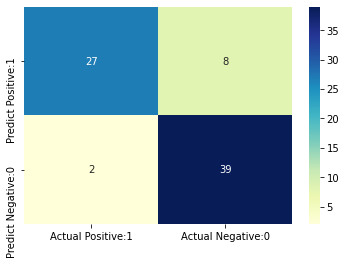

In [101]:
# Visualisasi confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### **Classification Metrices**

In [102]:
# Cetak classification report dari test set
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84        35
           1       0.83      0.95      0.89        41

    accuracy                           0.87        76
   macro avg       0.88      0.86      0.87        76
weighted avg       0.88      0.87      0.87        76



In [103]:
# Assign confusion matrix to variabel
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [104]:
# Print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8684


In [105]:
# Print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1316


In [106]:
# Print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7714


In [107]:
# Print recall or sensitivity score

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9310


In [108]:
# Print true positive rate

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9310


In [109]:
# Print false positive rate

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1702


In [110]:
# Print specificity 

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8298


**Using Support Vector Macine, we get the acuraction score: 0.8686 with Linear Kernel and C = 1 or 100**

# **Week 7 - Supervised Learning IV**

## **Multi Layer Perceptron Classifier**

In [111]:
# Import Multi layer perceptrons classifier dari neural network
from sklearn.neural_network import MLPClassifier

# Bangun model MLPClassifier dengan random state 0, solver lbfgs dan sisanya merupakan default parameter
mlp = MLPClassifier(solver='lbfgs', random_state=0)
# Terapkan model pada training set
mlp.fit(X_train, y_train)

# Cetak akurasi pada training dan test set
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.458150
Test set score: 0.460526


In [112]:
# Bangun model MLPClassifier dengan solver lbfgs, random state 0, hidden layer size 10 dan sisanya merupakan default parameter
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
# Terapkan model pada training set
mlp.fit(X_train, y_train)

# Cetak akurasi pada training dan test set
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.625551
Test set score: 0.657895


In [113]:
# Bangun model MLPClassifier dengan solver lbfgs, random state 0, hidden layer size 10 10 dan sisanya merupakan default parameter
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
# Terapkan model pada training set
mlp.fit(X_train, y_train)

# Cetak akurasi pada training dan test set
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.453744
Test set score: 0.460526


In [114]:
# Bangun model MLPClassifier dengan solver lbfgs, activation tanh, random state 0, hidden layer size 10 10 dan sisanya merupakan default parameter
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
# Terapkan model pada training set
mlp.fit(X_train, y_train)

# Cetak akurasi pada training dan test set
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.718062
Test set score: 0.736842


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [115]:
# Lakukan iterasi percobaan bangun model MLPRegressor dengan jumlah hidden layer size 10 dan 100, dan alpha 0.0001, 0.01, 0.1, dan 1
for n_hidden_nodes in [10, 100]:
  for alpha in [0.0001, 0.01, 0.1, 1]:
    # Bangun model dengan parameter secara dinamis sesuai iterasi
    mlp = MLPClassifier(max_iter=1000, solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
    # Terapkan model pada training set
    mlp.fit(X_train, y_train)

    # Cetak hasil percobaan berupa parameter, dan akurasi model pada training dan test set
    print("n_hidden = [{:d}, {:d}]\nalpha = {:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))
    print("\tTraining set score: %f" % mlp.score(X_train, y_train))
    print("\tTest set score: %f" % mlp.score(X_test, y_test))

n_hidden = [10, 10]
alpha = 0.0001
	Training set score: 0.709251
	Test set score: 0.710526


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


n_hidden = [10, 10]
alpha = 0.0100
	Training set score: 0.766520
	Test set score: 0.697368


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


n_hidden = [10, 10]
alpha = 0.1000
	Training set score: 0.841410
	Test set score: 0.842105
n_hidden = [10, 10]
alpha = 1.0000
	Training set score: 0.766520
	Test set score: 0.789474


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


n_hidden = [100, 100]
alpha = 0.0001
	Training set score: 0.933921
	Test set score: 0.828947


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


n_hidden = [100, 100]
alpha = 0.0100
	Training set score: 0.960352
	Test set score: 0.750000


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


n_hidden = [100, 100]
alpha = 0.1000
	Training set score: 0.960352
	Test set score: 0.723684
n_hidden = [100, 100]
alpha = 1.0000
	Training set score: 0.951542
	Test set score: 0.842105


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [116]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

# Bangun model MLPClassifier dengan random state 0 dan default parameter kemudian terapkan pada X_train_scaled dan y_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

# Cetak akurasi model pada training dan test set
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.934
Accuracy on test set: 0.842


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [117]:
# Bangun model MLPClassifier dengan max_iter 1000, random state 0 dan default parameter kemudian terapkan pada X_train_scaled dan y_train
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

# Cetak akurasi model pada training dan test set
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.829


In [118]:
# Bangun model MLPClassifier dengan max_iter 1000, alpha 1, random state 0 dan default parameter kemudian terapkan pada X_train_scaled dan y_train
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

# Cetak akurasi model pada training dan test set
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.885
Accuracy on test set: 0.868


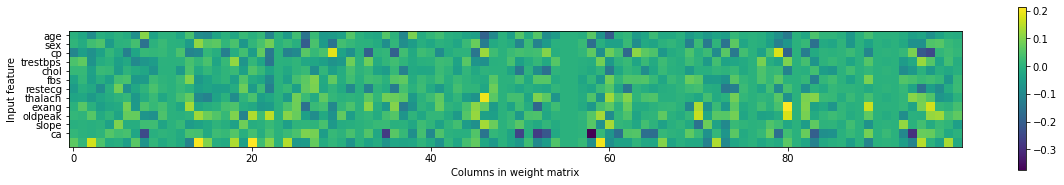

In [119]:
# Plotting column in weight matrix
plt.figure(figsize=(20, 3))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(12), feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

## **Gradient Boosting Classifier**

In [120]:
# Import library gradient boosting classifier dari ensemble
from sklearn.ensemble import GradientBoostingClassifier

# we rename the classes "false" and "true" for illustration purposes:
y_named = np.array(["False", "True"])[target.to_numpy()]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(data.to_numpy(), y_named, target.to_numpy(), random_state=0)

# build and fit the gradient boosting model to training data
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [121]:
# Print ukuran dimensi X test dan decision function dari X_test
print("X_test.shape:", X_test.shape)
print("Decision function shape:", gbrt.decision_function(X_test).shape)

X_test.shape: (76, 13)
Decision function shape: (76,)


In [122]:
# show the first few entries of decision_function
print("Decision function:", gbrt.decision_function(X_test)[:6])

Decision function: [-0.88299941  0.69701366  0.69701366 -1.38625321 -0.15762505  0.11773031]


In [123]:
# Print thresholded decision function dan predictions pada X_test
print("Thresholded decision function:\n", gbrt.decision_function(X_test) > 0)
print("Predictions:\n", gbrt.predict(X_test))

Thresholded decision function:
 [False  True  True False False  True False False False False  True  True
 False  True  True  True False  True False  True  True False False False
  True  True False False  True  True  True False  True  True  True  True
 False  True False False  True False  True False False  True  True  True
 False  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True False False  True]
Predictions:
 ['False' 'True' 'True' 'False' 'False' 'True' 'False' 'False' 'False'
 'False' 'True' 'True' 'False' 'True' 'True' 'True' 'False' 'True' 'False'
 'True' 'True' 'False' 'False' 'False' 'True' 'True' 'False' 'False'
 'True' 'True' 'True' 'False' 'True' 'True' 'True' 'True' 'False' 'True'
 'False' 'False' 'True' 'False' 'True' 'False' 'False' 'True' 'True'
 'True' 'False' 'True' 'True' 'True' 'True' 'True' 'True' 'False' 'True'
 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'Tru

In [124]:
# Make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# Use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions:", np.all(pred == gbrt.predict(X_test)))

pred is equal to predictions: True


In [125]:
# Create decision function from gradient boosting X_test
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

Decision function minimum: -1.39 maximum: 1.40


In [126]:
# Print shape of probabilities 
print("Shape of probabilities:", gbrt.predict_proba(X_test).shape)

Shape of probabilities: (76, 2)


In [127]:
# Show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test[:6]))

Predicted probabilities:
[[0.70744339 0.29255661]
 [0.33247467 0.66752533]
 [0.33247467 0.66752533]
 [0.79999342 0.20000658]
 [0.53932487 0.46067513]
 [0.47060137 0.52939863]]


In [128]:
# Cetak akurasi pada training dan test set
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train_named)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test_named)))

Accuracy on training set: 0.894
Accuracy on test set: 0.816
